# Some Well-Known Convnet Architectures

1. LeNet
1. AlexNet
1. VGGNet
1. GoogleNet: Inception
1. ResNet
1. DenseNet

## Related Pytorch codes are from:
- [Chapters 8 and 9 of d2l-pytorch](https://github.com/dsgiitr/d2l-pytorch)

## To Go
- [Tutorial on pytorch image classification by github.com/bentrevett](https://github.com/bentrevett/pytorch-image-classification)
- [A disciplined approach to neural network hyper-parameters: part 1 - learning rate, batch size, momentum and weight decay, by Leslie N. Smith](https://arxiv.org/pdf/1803.09820.pdf)
    - The learning rate finder of this author can be found in [fast.ai](fast.ai) which has made the method well-known through practical usage.

In [1]:
%matplotlib inline

from IPython.display import SVG

In [2]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def count_params(model):
    print('parameters: ', sum(p.numel() for p in model.parameters() if p.requires_grad)//1024, 'K')

## LeNet
One of the first published convolutional neural networks whose benefit was first demonstrated by Yann Lecun, then a researcher at AT&T Bell Labs, for the purpose of recognizing handwritten digits in images—[LeNet5](http://yann.lecun.com/exdb/lenet/).

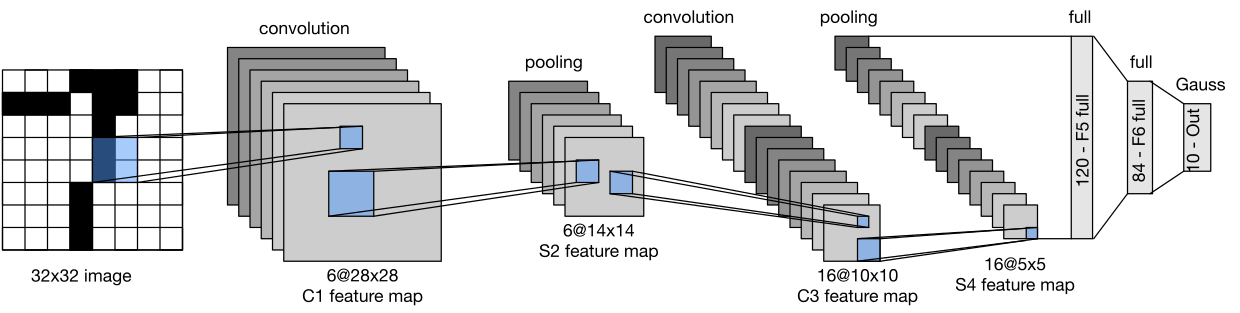

---
## AlexNet

Krizhevsky, Alex; Sutskever, Ilya; Hinton, Geoffrey E. (2017-05-24). **"ImageNet classification with deep convolutional neural networks"** Communications of the ACM. 60 (6): 84–90. doi:10.1145/3065386. ISSN 0001-0782.

In the end, the network’s size is limited mainly by the amount of memory available on current GPUs
and by the amount of training time that we are willing to tolerate. Our network takes between five
and six days to train on two GTX 580 3GB GPUs. All of our experiments suggest that our results
can be improved simply by waiting for faster GPUs and bigger datasets to become available.

-    AlexNet has a similar structure to that of LeNet, but uses more convolutional layers and a larger parameter space to fit the large-scale data set ImageNet.
-    Today AlexNet has been surpassed by much more effective architectures but it is a key step from shallow to deep networks that are used nowadays.
-    Although it seems that there are only a few more lines in AlexNet's implementation than in LeNet, it took the academic community many years to embrace this conceptual change and take advantage of its excellent experimental results. This was also due to the lack of efficient computational tools.
-    Dropout, ReLU and preprocessing were the other key steps in achieving excellent performance in computer vision tasks.

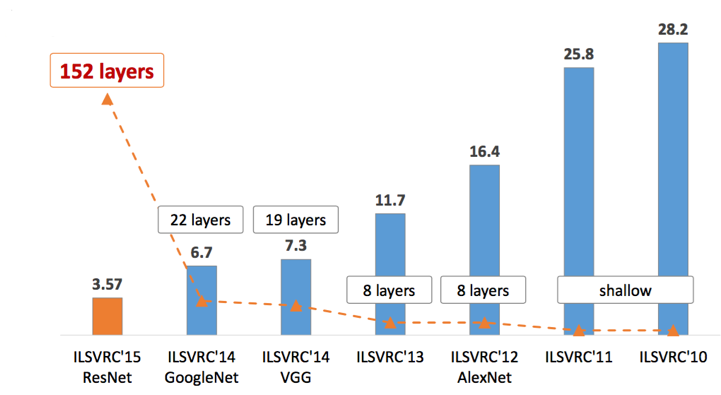

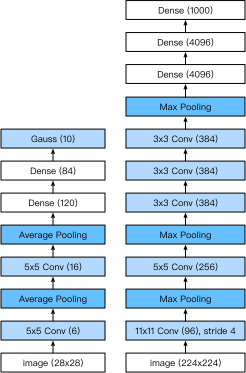

In [4]:
SVG(filename="figures/alexnet-all.svg")

In [5]:
alex = torchvision.models.alexnet()
print(alex)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
X = torch.randn(size=(1,3,224,224))

# convert to a sequentially layered mdel
net = nn.Sequential(*list(alex.features.children()),
                    alex.avgpool,
                    nn.Flatten(),
                   *list(alex.classifier.children()))
print(net)

print('X      input: ', X.shape)
for layer in net:
    X=layer(X)
    print(f'{layer.__class__.__name__:15}  Output shape:\t',X.shape)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (13): AdaptiveAvgPool2d(output_size=(6, 6))
  (14): Flatten()
  (15): Dropout(p=0.5, inplace=False)
  (16): Linear(in_features=9216, out_features=4096, bias=True)
  (17): ReLU(inplace=True)
  (18): Dropout(p=0.5, inplace=False)
  (19)

In [7]:
count_params(alex)

parameters:  59668 K


## VGGNet

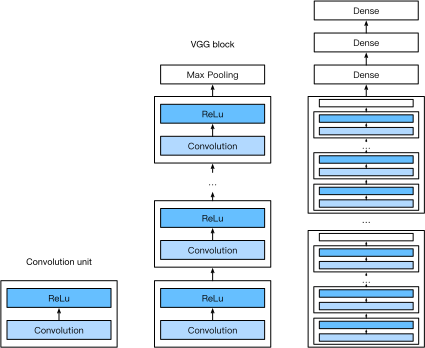

In [8]:
SVG(filename='figures/vgg.svg')

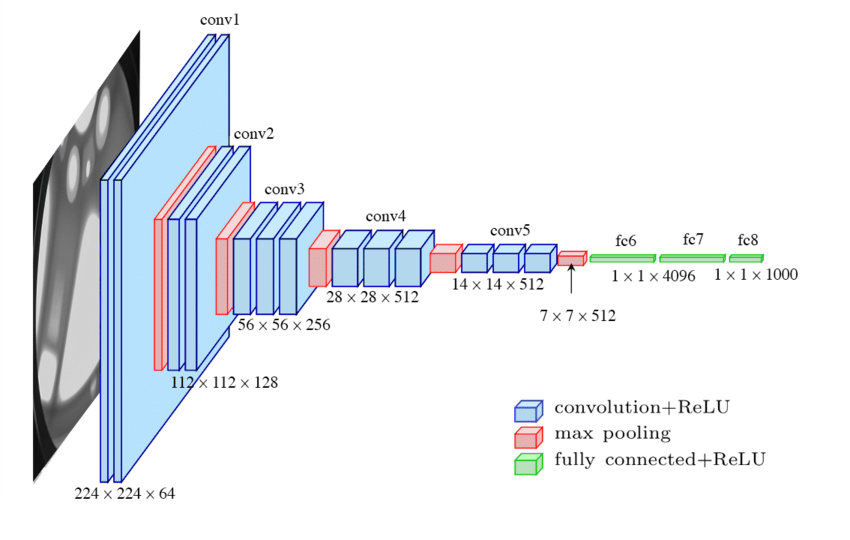

In [9]:
vgg = torchvision.models.vgg11()
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

### Summary

- VGG-11 constructs a network using reusable convolutional blocks. Different VGG models can be defined by the differences in the number of convolutional layers and output channels in each block.
- The use of blocks leads to very compact representations of the network definition. It allows for efficient design of complex networks.
-    In their work Simonyan and Ziserman experimented with various architectures. In particular, they found that several layers of deep and narrow convolutions (i.e. $3 \times 3$) were more effective than fewer layers of wider convolutions.


In [10]:
count_params(vgg)

parameters:  129749 K


## GoogleNet

In [11]:
inception = torchvision.models.inception_v3()

In [12]:
count_params(inception)

parameters:  26524 K


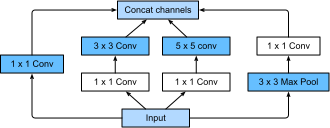

In [13]:
SVG(filename='figures/inception.svg')

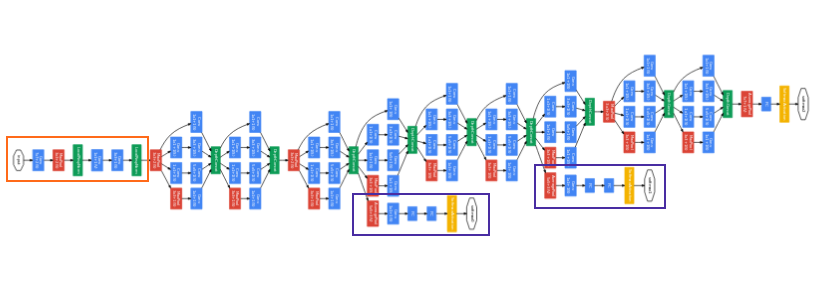

---
## ResNet: Residual Networks

- [Deep Residual Learning for Image Recognition, 2015, Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun](https://arxiv.org/abs/1512.03385)

- Skip Connection

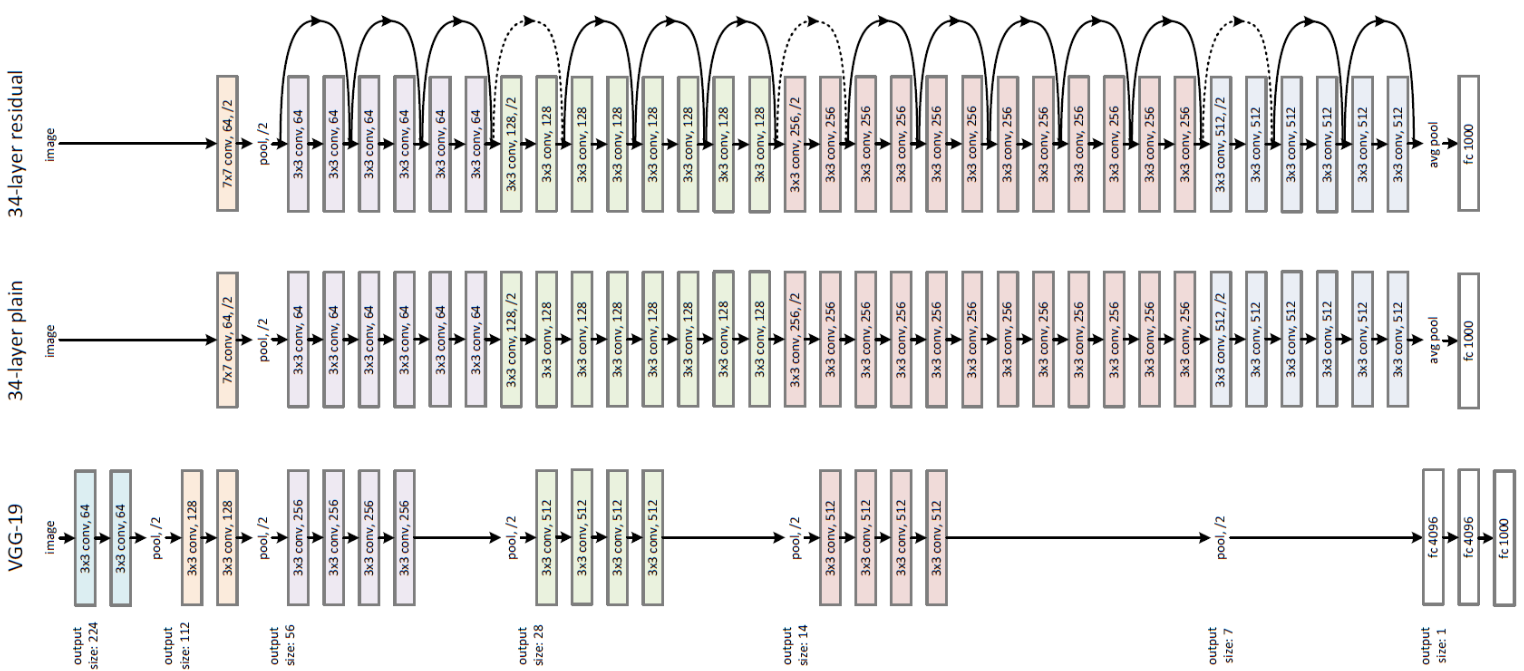

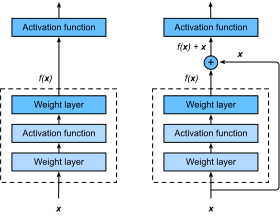

In [14]:
SVG(filename='figures/residual-block.svg')

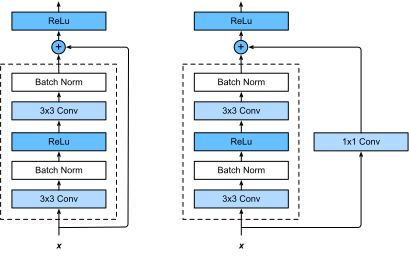

In [15]:
SVG(filename='figures/ResNetBlock.svg')

In [16]:
resnet = torchvision.models.resnet18()
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
count_params(resnet)

parameters:  11415 K


### Source code
Have a look at the source code: https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

In [18]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

---
## DenseNet: Densely Cnnected Networks

- Best Paper Award in 2017 CVPR

- See a good illustrations and animations:
    https://towardsdatascience.com/review-densenet-image-classification-b6631a8ef803

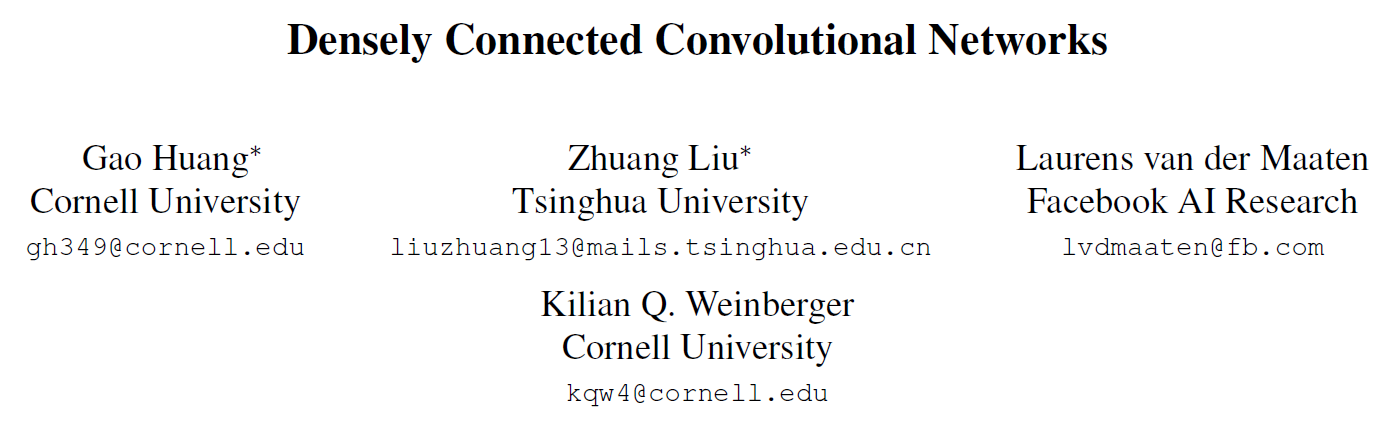

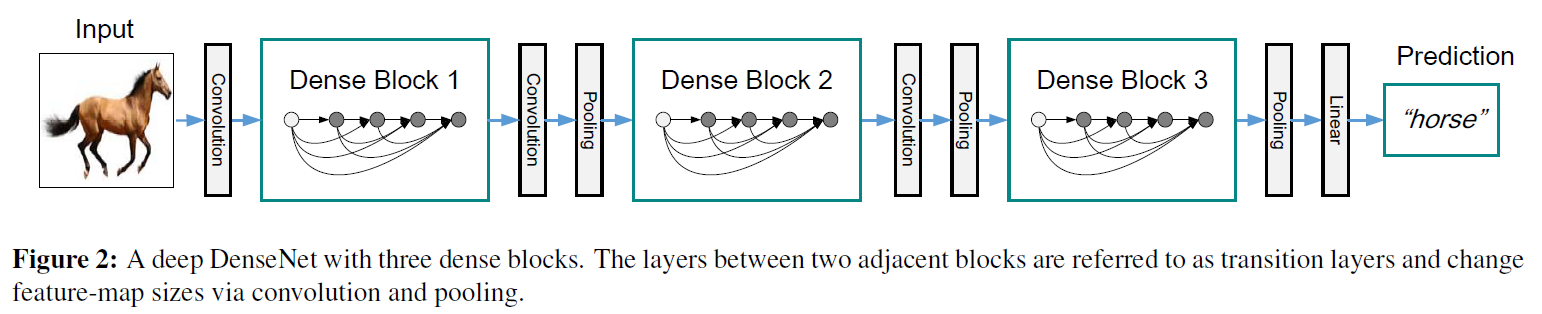

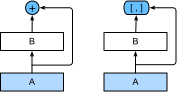

In [19]:
SVG(filename= 'figures/densenet.svg')

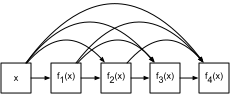

In [20]:
# skip connection
SVG(filename= 'figures/DenseNetDense.svg')

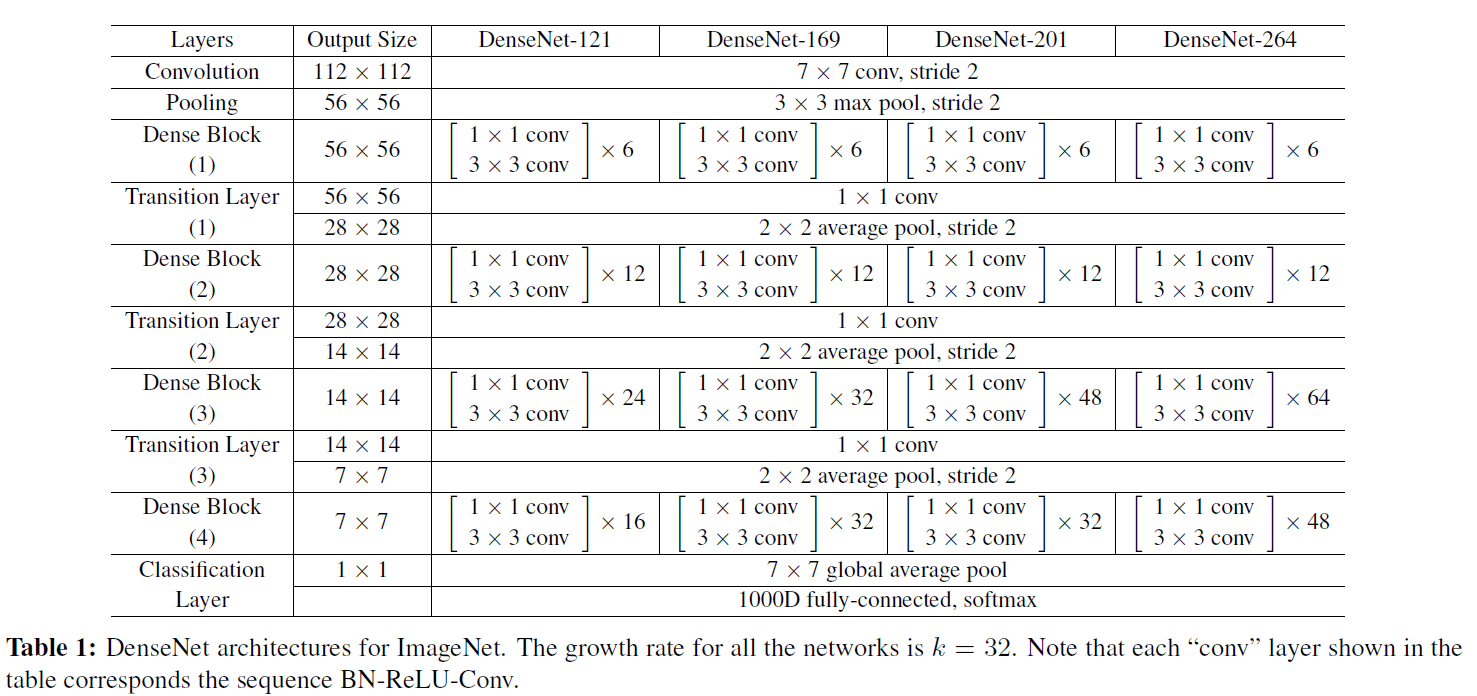

In [21]:
densenet = torchvision.models.densenet121()
densenet

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [22]:
count_params(densenet)

parameters:  7791 K


In [23]:
# https://github.com/pytorch/vision/blob/master/torchvision/models/densenet.py
class DenseNet(nn.Module):
    def __init__(self, growth_rate=32, block_config=(6, 12, 24, 16),
                 num_init_features=64, bn_size=4, drop_rate=0, num_classes=1000, memory_efficient=False):
        super(DenseNet, self).__init__()

        # First convolution
        self.features = nn.Sequential(OrderedDict([
            ('conv0', nn.Conv2d(3, num_init_features, kernel_size=7, stride=2,
                                padding=3, bias=False)),
            ('norm0', nn.BatchNorm2d(num_init_features)),
            ('relu0', nn.ReLU(inplace=True)),
            ('pool0', nn.MaxPool2d(kernel_size=3, stride=2, padding=1)),
        ]))

        # Each denseblock
        num_features = num_init_features
        for i, num_layers in enumerate(block_config):
            block = _DenseBlock(
                num_layers=num_layers,
                num_input_features=num_features,
                bn_size=bn_size,
                growth_rate=growth_rate,
                drop_rate=drop_rate,
                memory_efficient=memory_efficient
            )
            self.features.add_module('denseblock%d' % (i + 1), block)
            num_features = num_features + num_layers * growth_rate
            if i != len(block_config) - 1:
                trans = _Transition(num_input_features=num_features,
                                    num_output_features=num_features // 2)
                self.features.add_module('transition%d' % (i + 1), trans)
                num_features = num_features // 2

        # Final batch norm
        self.features.add_module('norm5', nn.BatchNorm2d(num_features))

        # Linear layer
        self.classifier = nn.Linear(num_features, num_classes)

    def forward(self, x):
        features = self.features(x)
        out = F.relu(features, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        out = self.classifier(out)
        return out

### Learning Curve
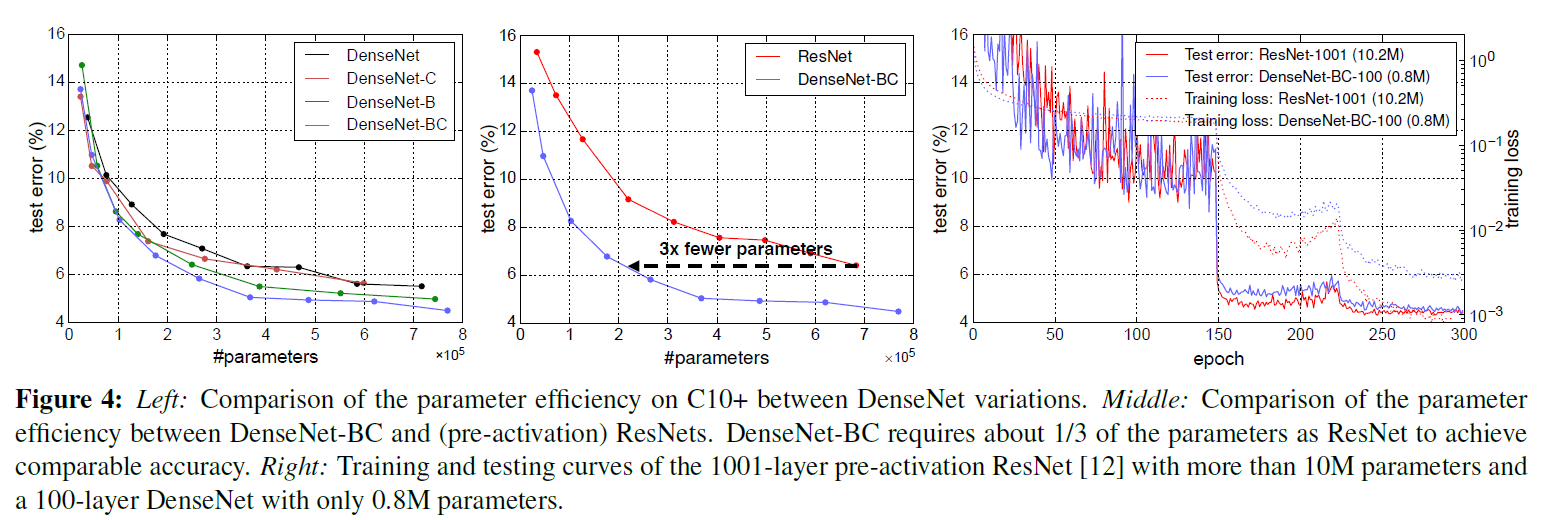

---
## Number of Trainable Parameters

In [24]:
models = [alex, vgg, inception, resnet, densenet]
for m in models:
    count_params(m)

parameters:  59668 K
parameters:  129749 K
parameters:  26524 K
parameters:  11415 K
parameters:  7791 K


---
## Practicum

1. CIFAR10 Dataset
2. Tiny ImageNet Dataset

- Choose one of the network models.
- Report your best validation error rate.

Conditions:
- pretrained=False

## Where to go?

Try Professional Level Image Classification: https://github.com/bentrevett/pytorch-image-classification/blob/master/5%20-%20ResNet.ipynb

End.